# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Set desired number of cities
num_cities = 500
# Set random seed to generate the same random lat and lng combinations
SEED = 50
# Set seed
np.random.seed(SEED)
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=num_cities*10)
lngs = np.random.uniform(low=-180.000, high=180.000, size=num_cities*10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
    if len(cities) >= num_cities:
        print(f"the sample includes {len(cities)} cities")
        break

the sample includes 500 cities


In [17]:
#building url to access api data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Loop through the list of cities and perform a request for data on each
city_list = []

print("Beginning Data Retrieval")
for city in cities:
    try:
        print(f"Processing Record of | {city}")
        response = requests.get(query_url + city).json()
        name = (response["name"])
        lat = (response['coord']['lat'])
        long = (response['coord']['lon'])
        temp = (response['main']['temp'])
        humidity = (response['main']['humidity'])
        cloudiness = (response['clouds']['all'])
        windspeed = (response['wind']['speed'])
        city_dictionary = {"City Name": name,
                          "Lattitude": lat,
                          "Longitude": long,
                          "temperature": temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Windspeed": windspeed}
        city_list.append(city_dictionary)
    
    except(KeyError):
        print("City not found")
        next
print(city_list[0])

Beginning Data Retrieval
Processing Record of | hithadhoo
Processing Record of | new norfolk
Processing Record of | mahebourg
Processing Record of | kachikau
City not found
Processing Record of | isangel
Processing Record of | dikson
Processing Record of | tete
Processing Record of | sitka
Processing Record of | nikolskoye
Processing Record of | taolanaro
City not found
Processing Record of | jamestown
Processing Record of | diego de almagro
Processing Record of | cape town
Processing Record of | amderma
City not found
Processing Record of | ostrovnoy
Processing Record of | praia
Processing Record of | ahipara
Processing Record of | komsomolskiy
Processing Record of | torbay
Processing Record of | karratha
Processing Record of | hobyo
Processing Record of | mumford
Processing Record of | illoqqortoormiut
City not found
Processing Record of | kattivakkam
Processing Record of | ormond beach
Processing Record of | ushuaia
Processing Record of | griffith
Processing Record of | busselton
Pr

Processing Record of | porto nacional
Processing Record of | alyangula
Processing Record of | tupancireta
Processing Record of | natitingou
Processing Record of | chuguyevka
Processing Record of | powassan
Processing Record of | kirakira
Processing Record of | nsanje
Processing Record of | bathsheba
Processing Record of | midland
Processing Record of | yershov
City not found
Processing Record of | marcona
City not found
Processing Record of | hasaki
Processing Record of | benguela
Processing Record of | marsa matruh
Processing Record of | fez
Processing Record of | bilma
Processing Record of | sabha
Processing Record of | norman wells
Processing Record of | macapa
Processing Record of | tura
Processing Record of | pandan
Processing Record of | lavrentiya
Processing Record of | auki
Processing Record of | fortuna
Processing Record of | fort smith
Processing Record of | port macquarie
Processing Record of | provideniya
Processing Record of | ilo
Processing Record of | bluff
Processing Re

Processing Record of | alofi
Processing Record of | atar
Processing Record of | rongcheng
Processing Record of | alta floresta
Processing Record of | tefe
Processing Record of | dharchula
Processing Record of | mildura
Processing Record of | puerto baquerizo moreno
Processing Record of | cayenne
Processing Record of | broken hill
Processing Record of | bastrop
Processing Record of | mangan
Processing Record of | egvekinot
{'City Name': 'Hithadhoo', 'Lattitude': -0.6, 'Longitude': 73.08, 'temperature': 82.63, 'Humidity': 74, 'Cloudiness': 87, 'Windspeed': 7.61}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
city_list_df = pd.DataFrame.from_dict(city_list)
export_csv = city_list_df.to_csv (r'cities_dataframe.csv', index = None, header=True)
city_list_df.head()

,City Name,Cloudiness,Humidity,Lattitude,Longitude,Windspeed,temperature
0,Hithadhoo,87,74,-0.60,73.08,7.61,82.63
1,New Norfolk,75,66,-42.78,147.06,5.82,50.25
2,Mahebourg,75,60,-20.41,57.70,12.75,71.29
3,Isangel,20,88,-19.55,169.27,10.42,68.00
4,Dikson,100,96,73.51,80.55,10.58,41.77


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature(F)')

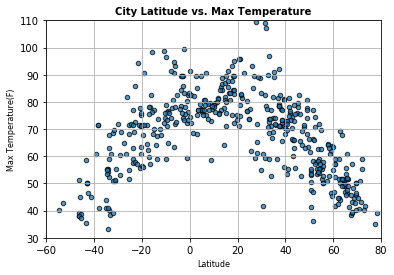

In [30]:
ax1 = city_list_df.plot.scatter("Lattitude",
                      "temperature",
                      marker="o", 
                      facecolors="DarkBlue", 
                      edgecolors="black", alpha=0.75) 
plt.ylim(30, 110)
plt.xlim(-60,80)
plt.grid()
ax1.set_title('City Latitude vs. Max Temperature', fontdict={'fontsize': 10, 'fontweight': 'heavy'})
ax1.set_xlabel("Latitude", fontsize=10)
ax1.set_ylabel('Max Temperature (F)', fontsize=10)


#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

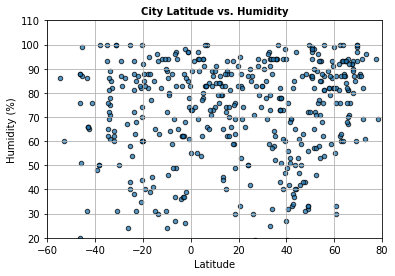

In [31]:
ax1 = city_list_df.plot.scatter("Lattitude",
                      "Humidity",
                      marker="o", 
                      facecolors="DarkBlue", 
                      edgecolors="black", alpha=0.75) 
plt.ylim(20, 110)
plt.xlim(-60,80)
plt.grid()
ax1.set_title('City Latitude vs. Humidity', fontdict={'fontsize': 10, 'fontweight': 'heavy'})
ax1.set_xlabel("Latitude", fontsize=10)
ax1.set_ylabel('Humidity (%)', fontsize=10)

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

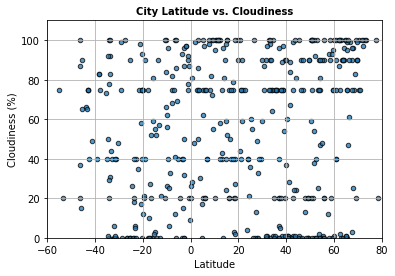

In [40]:
ax1 = city_list_df.plot.scatter("Lattitude",
                      "Cloudiness",
                      marker="o", 
                      facecolors="DarkBlue", 
                      edgecolors="black", alpha=0.75) 
plt.ylim(0, 110)
plt.xlim(-60,80)
plt.grid()
ax1.set_title('City Latitude vs. Cloudiness', fontdict={'fontsize': 10, 'fontweight': 'heavy'})
ax1.set_xlabel("Latitude", fontsize=10)
ax1.set_ylabel('Cloudiness (%)', fontsize=10)

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Windspeed (mph)')

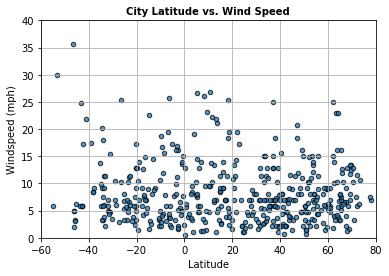

In [38]:
ax1 = city_list_df.plot.scatter("Lattitude",
                      "Windspeed",
                      marker="o", 
                      facecolors="DarkBlue", 
                      edgecolors="black", alpha=0.75) 
plt.ylim(0, 40)
plt.xlim(-60,80)
plt.grid()
ax1.set_title('City Latitude vs. Wind Speed', fontdict={'fontsize': 10, 'fontweight': 'heavy'})
ax1.set_xlabel("Latitude", fontsize=10)
ax1.set_ylabel('Windspeed (mph)', fontsize=10)

# Observational Trends

**Cities with lattitude in the range -20 to 40 have the highest temperatures

**The city with the highest windspeed has the lowest lattitude value

**Similarly, the city with the lowest humdity percent has the lowest lattitude value
